In [1]:
file = open("vectors.txt","r")
     = file.readlines()
Nlines = len(data)
print("Nlines = ",Nlines)
wfile = open("words_idx.txt","r")
words = wfile.readlines()
Nwords = len(words)
print("Nwords = ",Nwords)
import numpy as np
import matplotlib.pyplot as plt

Nlines =  278
Nwords =  18446


In [2]:
Ndocs = int(Nlines/2)
A = np.zeros((Nwords,Ndocs))
Doc_idx = np.zeros((Ndocs,))
label = np.zeros((Ndocs,))
for j in range(Ndocs):
    Doc_idx = data[2*j]
    line = data[2*j+1]
    line = line.split()
    numbers = [eval(i) for i in line]
    label = numbers[0]
    w_idx = np.array(numbers[1::2])-1 # make indices start from 0
    w_count = numbers[2::2]
    A[w_idx,j] = 1
# np.savetxt("Amatrix.csv", A, delimiter=",")



In [99]:
import numpy as np

def lee_seung(A,shape,k = 10,max_iter = 400,verbose = False):
    W = np.random.rand(shape[0],k)
    H = np.random.rand(k,shape[1])
    R = A - np.matmul(W,H)
    if verbose:
        R_FroNorm = np.zeros(max_iter)
    for iter in range(max_iter):
        Wnew = W*np.matmul(A,np.transpose(H))/(np.matmul(W,np.matmul(H,np.transpose(H))))
        W = Wnew
        Wt = np.transpose(W)
        Hnew = H*np.matmul(Wt,A)/(np.matmul(np.matmul(Wt,W),H))
        H = Hnew
        R = A - np.matmul(W,H)
        if verbose:
            R_FroNorm[iter] = np.linalg.norm(R,'fro')
    if not verbose:
        return W,H
    else:
        return W,H,R_FroNorm

def proj_grad_descent(A,shape,k = 10,max_iter = 400,alpha = .1,beta = 0.0,verbose = False):
    W = np.random.rand(shape[0], k)
    H = np.random.rand(k, shape[1])
    R = A - np.matmul(W,H)
    lambda_W, lambda_H = 1.0, 1.0
    if verbose:
        R_FroNorm = np.zeros(max_iter)
    for iter in range(max_iter):
        # Wnew = W + alpha*np.matmul(A - np.matmul(W,H),H.T)
        Wnew = W + alpha*(np.matmul(A,H.T) - np.matmul(np.matmul(W,H),H.T) - lambda_W * np.sign(W))
        # Wnew = W + alpha * (A @ H.T - W @ H @ H.T)
        W = np.maximum(Wnew, 0)
        # R = A - np.matmul(W,H)
        # Hnew = H + alpha*np.matmul(W.T,A - np.matmul(W,H))
        Hnew = H + alpha*(np.matmul(W.T,A)-np.matmul(W.T,np.matmul(W,H)) - lambda_H * np.sign(H))
        # Hnew = H + alpha * (W.T @ A - W.T @ W @ H)
        alpha = alpha/(1+beta)
        # alpha = alpha*beta
        H = np.maximum(Hnew, 0)
        R = A - np.matmul(W,H)
        if verbose:
            R_FroNorm[iter] = np.linalg.norm(R,'fro')
    if not verbose:
        return W,H
    else:
        return W,H,R_FroNorm
    
def hals(A, shape, k=10, max_iter=200, verbose=False):
    W = np.random.rand(shape[0], k)
    H = np.random.rand(k, shape[1])
    # W = np.random.rand(k, shape[1])
    # H = np.random.rand(shape[0], k)
    R = A - np.matmul(W, H)

    if verbose:
        R_FroNorm = np.zeros(max_iter)

    for iter in range(max_iter):
        AtW = np.dot(A.T,W)
        WtW = np.dot(W.T,W)
        for j in range(k):
            u = H[j,:] + AtW[:,j] - np.dot(H.T,WtW[:,j])
            H[j,:] = np.maximum(u, 0)
        AH = np.dot(A, H.T)
        HtH = np.dot(H, H.T)
        for j in range(k):
            v = W[:,j]*HtH[j,j] + AH[:,j] - np.dot(W,HtH[:,j])
            W[:,j] = np.maximum(v, 0)
            mag = np.linalg.norm(W[:,j]) # basically here to stop explosion
            if mag > 0:
                W[:,j] = W[:,j] / mag

        if verbose:
            R = A - np.matmul(W, H)
            R_FroNorm[iter] = np.linalg.norm(R, 'fro')

    if not verbose:
        return W, H
    else:
        return W, H, R_FroNorm

212.2396595831076


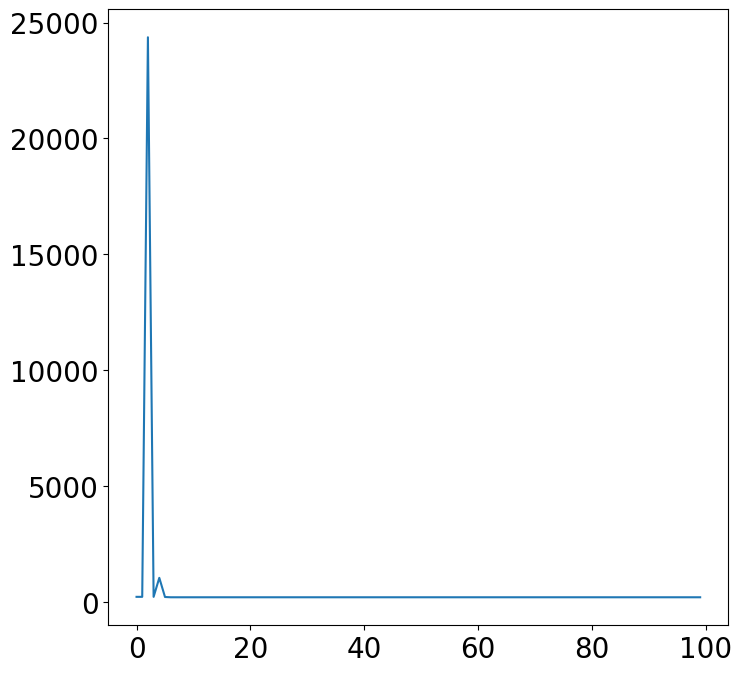

In [90]:
k = 10

W,H,R_FroNorm = proj_grad_descent(A,(Nwords,Ndocs),k=k,alpha=.1,max_iter=100,verbose=True)
# W,H,R_FroNorm = lee_seung(A,(Nwords,Ndocs),k=k,verbose=True)
# W,H,R_FroNorm = hals(A,(Nwords,Ndocs),k=k,max_iter=20,verbose=True)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
plt.plot(R_FroNorm)
print(R_FroNorm[-1])

k= 3, F-norm: 228.15599195759802
k= 5, F-norm: 212.12971421097996
k= 10, F-norm: 211.57441721493603
k= 20, F-norm: 218.86517215387133
k= 50, F-norm: 212.10775501613657


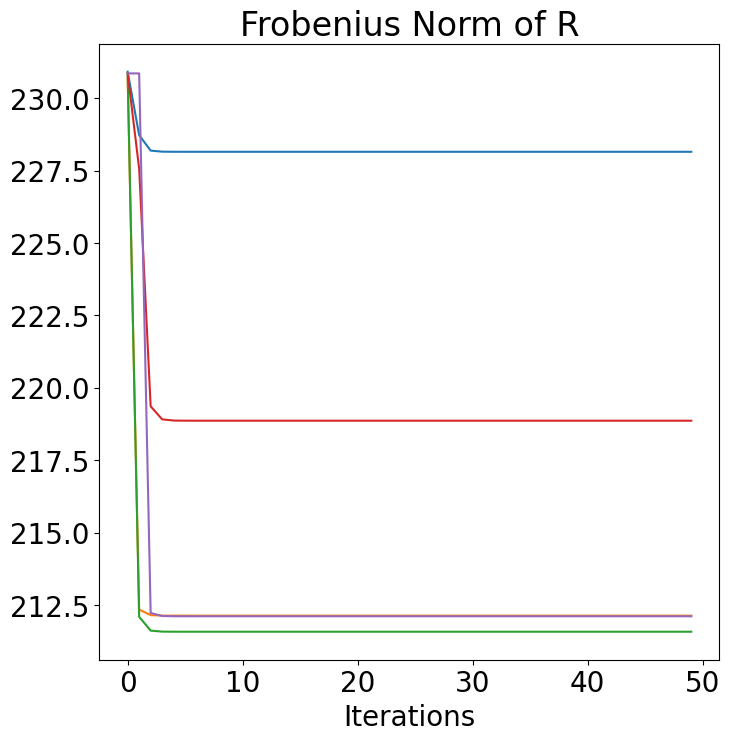

In [112]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
ax.title.set_text('Frobenius Norm of R')
plt.xlabel('Iterations')
for k in [3,5,10,20,50]: 
    W,H,R_FroNorm = proj_grad_descent(A,(Nwords,Ndocs),max_iter=50,k=k,alpha=1/10,beta=.1,verbose=True)
    # W,H,R_FroNorm = lee_seung(A,(Nwords,Ndocs),k=k,max_iter=100,verbose=True)
    # W,H,R_FroNorm = hals(A,(Nwords,Ndocs),k=k,max_iter=10,verbose=True)
    plt.plot(R_FroNorm)
    print(f'k= {k}, F-norm: {R_FroNorm[-1]}')

In [38]:
# k = 10
k_largest = 10
for j in range(k):
    # idx = np.argmax(W[:,j])
    largest_idxs = np.argsort(W[:,j])[-k_largest:][::-1]
    for idx in largest_idxs:
        # print()
        print(idx,words[idx-1])
    # print(largest_idxs)

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

18437 18437 u11

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

18437 18437 u11

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

18437 18437 u11

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

18437 18437 u11

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

18437 18437 u11

0 18446 u18
18445 18445 u17

18444 18444 u16

18443 18443 u14b

18442 18442 u14g

18441 18441 u14

18440 18440 u13

18439 18439 u12b

18438 18438 u12g

184

1 1 florida

6 6 take

7 7 home

8 8 the

10 10 your

18 18 and

36 36 this

37 37 you

38 38 will

39 39 need

43 43 which

44 44 can

46 46 for

47 47 free

48 48 from

52 52 gif

54 54 click

55 55 our

60 60 available

67 67 all

69 69 are

78 78 area

79 79 call

93 93 email

96 96 com

113 113 south

147 147 contact

148 148 site

163 163 here

164 164 not

177 177 first

178 178 time

183 183 over

190 190 please

193 193 best

199 199 one

214 214 out

219 219 with

224 224 make

227 227 just

228 228 that

239 239 information

244 244 each

276 276 jpg

283 283 years

291 291 service

295 295 their

312 312 see

314 314 only

318 318 also

320 320 who

325 325 new

370 370 any

373 373 what

379 379 2003

385 385 about

388 388 most

415 415 get

419 419 when

428 428 there

437 437 phone

448 448 how

461 461 some

490 490 more

507 507 may

539 539 have

553 553 would

579 579 find

597 597 help

600 600 page

605 605 other

652 652 links

732 732 they

784 784 provide

809 

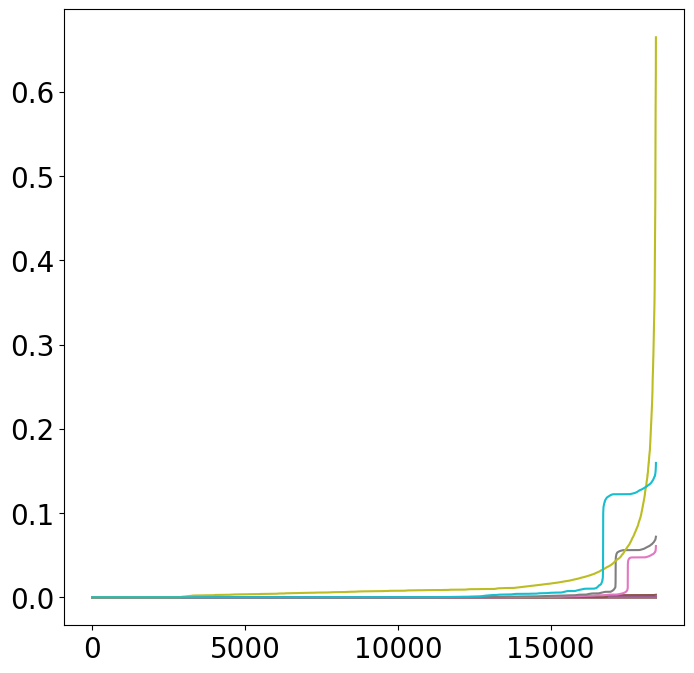

In [244]:
# idx = np.argmax(W[:,8])
# words[idx]
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))

for j in range(k):
    ind = np.squeeze(np.argwhere(W[:,j] > 0.3))
    # print(W[ind,j])
    plt.plot(np.sort(W[:,j]))
    if len(ind.tolist()) > 0:
        for i in range(len(ind.tolist())):
            print(ind[i]+1,words[ind[i]])

In [78]:
import scipy

U,s,V = scipy.linalg.svd(A)
k=10
A10 = U[:,:k]@np.diag(s[:k])@V[:k,:]
np.linalg.norm(A-A10,ord='fro')

np.float64(187.72408972726205)

In [83]:
1- 2*np.sqrt(s[0])/(np.sqrt(s[-1])+np.sqrt(s[0]))

np.float64(-0.6652833804048082)